# Задание взято с [платформы](https://karpov.courses/)
В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

### Задание
1. Загрузите [данные](https://disk.yandex.ru/d/guhDSjFliVqwtg), проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
5. Проанализируйте CTR с разбивкой по рекламной кампании.
1. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
1. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
1. Посчитайте конверсию из клика в покупку.


### Описание данных
- `ad_id` – идентификатор объявления (рекламы)
- `xyz_campaign_id` – идентификатор рекламной кампании в базе компании X
- `fb_campaign_id` – идентификатор кампании в Facebook
- `age` – возрастная группа, которой показывалась реклама
- `gender` – пол тех, кому показывалась реклама
- `interest` –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
- `impressions` – число показов
- `clicks` – число кликов
- `spent` – сумма, которую компания потратила на показ объявления 
- `total_conversion` – количество людей, которые заинтересовались продуктом после просмотра рекламы
- `approved_conversion` – количество людей, которые купили продукт после просмотра рекламы


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from urllib.parse import urlencode
import json

### 1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются. 

Сколько уникальных рекламных кампаний было проведено? 

In [3]:
def parse_data(base_url, public_key):
    
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    return pd.read_csv(download_url)

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
data_url = 'https://disk.yandex.ru/d/guhDSjFliVqwtg'

In [7]:
data = parse_data(base_url, data_url)

In [8]:
data 

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [9]:
data.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [31]:
data.xyz_campaign_id.unique()

array([ 916,  936, 1178])

### 2. Постройте график распределения числа показов (`Impressions` – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


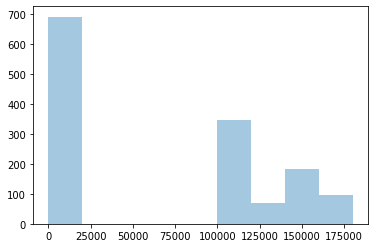

In [28]:
df_plot = data.groupby('fb_campaign_id', as_index=False) \
    .agg({'Impressions': 'sum'})

df_plot['Impressions'] = np.log(df_plot['Impressions'])

df_plot

sns.distplot(df_plot, kde=False)

### 3. Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [30]:
data = data.assign(CTR=data.Clicks/data.Impressions)
data.sort_values('CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


### 4. Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).

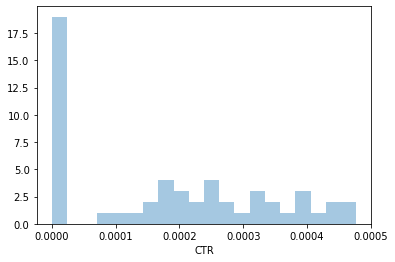

In [33]:
sns.distplot(data.query('xyz_campaign_id == "916"')['CTR'], kde=False, bins=20)

### 5. CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.


In [39]:
import scipy.stats as ss

data = data.assign(CPC=data.Spent/data.Clicks)
data.sort_values('CPC', ascending=False)

round(ss.iqr(data['CPC'], nan_policy='omit'), 2)

0.25

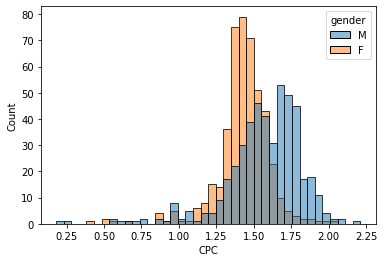

In [43]:
sns.histplot(data=data.dropna(), x='CPC', hue='gender', kde=False )

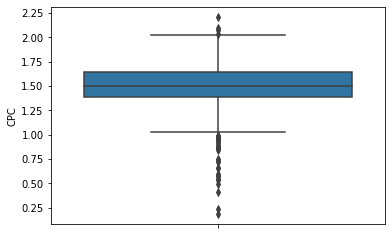

In [46]:
sns.boxplot(data=data.dropna(), y='CPC')

### 6. Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

In [51]:
data = data.assign(CR=round(data.Approved_Conversion*100/data.Clicks, 2))
data.query('ad_id==1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09
